In [3]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 
The woman was aware that four cups were poured milk first, and four were poured with tea first.
##### (This is a hyper-geometric problem.)

Step 1: State null (the one you're trying to disprove, should include equality) and alternate hypotheses
##### Answer: Hn = the probability that the woman picks correctly is due to chance, 50%-50%. She cannot predict with any consistency/beyond randomness. Ha = the woman can predict with consistency whether or not tea was added first.

Step 2: determine/calculate a test statistic (a way to measure the null hypothesis against the data collected, quantify the difference between the two)
##### Answer: number of times she correctly chose that tea was poured first (if you know this you can find the other).

If Hn true, 
$X~Hypergeom(M=8,n=4,N=4)$

#### M = # teacups
#### n = # choices
#### N = # 
#### Xobs = 3,  We observed that she got three right (when considering the cups filled tea first)

In [6]:
M,n,N=8,4,4
stats.hypergeom.rvs(M,n,N,size=10)

array([2, 1, 1, 3, 3, 2, 2, 4, 2, 1])

Step 3: determine the distribution of the test statistic (under the null hypothesis) and compute a p-value (represents probability of getting the test statistic or "weirder") 
##### p-value, in this problem, is the probability that the woman will get three or more right on average.


In [8]:
M,n,N=8,4,4
print(stats.hypergeom.pmf([3,4],M,n,N).sum())
print(1-stats.hypergeom.cdf(2,M,n,N))

0.24285714285714263
0.24285714285714288


Step 4: conclude (low/high p-value? what does that mean? reject the null hypothesis? - generally reject if the p-value is low (usually less than 5%))
##### We fail to reject the null hypothesis because we don't have enough evidence.

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [10]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: Null Hypothesis: the two species (virginica and versicolor) have equal mean sepal width. (The fact that the virginica species has a larger mean sepal width in the table is not consistent with average natural occurances, it is due to chance alone.) Alternate Hypothesis: virgninica species has a larger mean sepal width that the versicolor (the data shown in the table did not occur simply by chance). 

Step 2: (calculate a test statistic) in this case, use the difference in sample means
If Hn is true, the difference in the sample means should be around 0. 

In [15]:
# This line gives the observed difference
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs

0.20399999999999974

Step 3: (determine distribution of ts and calculate p)

In [27]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs
iris_sub.show()

species,sepal_width
versicolor,3.2
versicolor,3.2
versicolor,3.1
versicolor,2.3
versicolor,2.8
versicolor,2.8
versicolor,3.3
versicolor,2.4
versicolor,2.9
versicolor,2.7


In [28]:
num_obs=iris_sub.num_rows
ts=[]
for _ in np.arange(10000):
    iris_sample=iris_sub.with_column("sampled",iris_sub.sample(num_obs,with_replacement=False).column(1))
    ts=np.append(ts,np.diff(iris_sample.group(0,np.mean).column(2))[0])

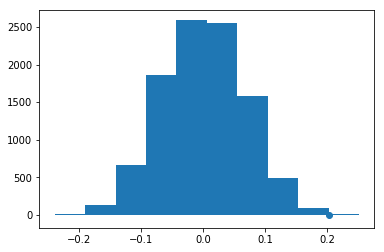

In [29]:
plt.hist(ts)
plt.scatter(obs,0)
plt.show()

Step 4:

In [30]:
np.mean(ts>=obs)

0.0011